# Demo: GASLITE Attack

The following demonstrates the crafting of a _single_ adversarial passage, containing negative content on Harry Potter, using **_GASLITE_** attack. Then, we **insert ("poison")** this passage to the 8.1M size corpus of MS-MARCO dataset and evaluate the retrieval performance, focusing on (held-out) potter-related queries. Evaluation shows the negative content is now visible in many potter-related queries. 

In [1]:
# ! pip install git+https://github.com/matanbt/attack-retrieval
# ! pip install livelossplot

## Setup

In [2]:
# Run config
concept_to_attack = "potter"
concept_portion_to_train = 0.5
dataset_name = "msmarco"
data_split = "train-concepts"
data_portion = 1.0
model_hf_name = "Snowflake/snowflake-arctic-embed-m"
sim_func_name = "cos_sim"

# Adversarial passage config
mal_info =  "Voldemort was right all along!"
trigger_len = 30

# Attack config
max_batch_size = 256
n_iter = 100
n_grad = 5
n_cand = 128
n_flip = 20
time_limit_in_seconds = None  # can be set to limit the attack time

## Load targeted queries and embedding model

In [3]:
from src import data_utils

# Load 'potter' query ids
# Evaluate on the held-out test-set:
with open(f"config/cover_alg/concept-{concept_to_attack}.yaml", "r") as f:
    import yaml
    concept_config = yaml.safe_load(f)
    concept_qids = concept_config['concept_qids']  # fetched from the attack config

heldin_concept_qids, heldout_concept_qids = (concept_qids[:int(len(concept_qids)*concept_portion_to_train)],
                                             concept_qids[int(len(concept_qids)*concept_portion_to_train):])

# Load dataset:
corpus, queries, qrels, _ = data_utils.load_dataset(
    dataset_name=dataset_name,
    data_split=data_split,
    data_portion=data_portion,
    embedder_model_name=model_hf_name,
    filter_in_qids=concept_qids,
)

# Example queries
print("\n".join([queries[qid] for qid in heldin_concept_qids[:5]]))

/home/sharifm/students/matanbentov/conda/anaconda3/lib/python3.8/site-packages/beir/util.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/a/home/cc/students/cs/matanbentov/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


  0%|          | 0/8841823 [00:00<?, ?it/s]

Represent this sentence for searching relevant passages:who played cedric in harry potter
Represent this sentence for searching relevant passages:who is percival graves harry potter
Represent this sentence for searching relevant passages:who was beatrix potter
Represent this sentence for searching relevant passages:which is the longest harry potter book
Represent this sentence for searching relevant passages:who is gilderoy lockhart in harry potter


In [4]:
from src.models.retriever import RetrieverModel

# Load retriever model in a wrapper:
model = RetrieverModel(
    model_hf_name=model_hf_name,
    sim_func_name=sim_func_name,
    max_batch_size=max_batch_size,
)    

You try to use a model that was created with version 2.7.0.dev0, however, your version is 2.7.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





In [5]:
# Define the objective, i.e., the target centroid
# Get the centroid of the held-in concept-specific query embeddings 
emb_targets = model.embed(
    texts=[queries[qid] for qid in heldin_concept_qids]  # held-in concept queries
).mean(dim=0).unsqueeze(0).cuda()

emb_targets.shape

Embedding...: 100%|██████████| 1/1 [00:07<00:00,  7.94s/it]


torch.Size([1, 768])

In [6]:
from src.full_attack import initialize_p_adv


P_adv, trigger_slice, _ = initialize_p_adv(
    mal_info=mal_info,
    trigger_loc='suffix',
    trigger_len=trigger_len,
    adv_passage_init='lm_gen',
    model=model,
)
P_adv = P_adv.to('cuda')

model.tokenizer.decode(P_adv['input_ids'][0])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/sharifm/students/matan

>>


"[CLS] voldemort was right all along! he'd become the most powerful dark lord in the history of both of the universe. and so, voldemort wanted to make his mark [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

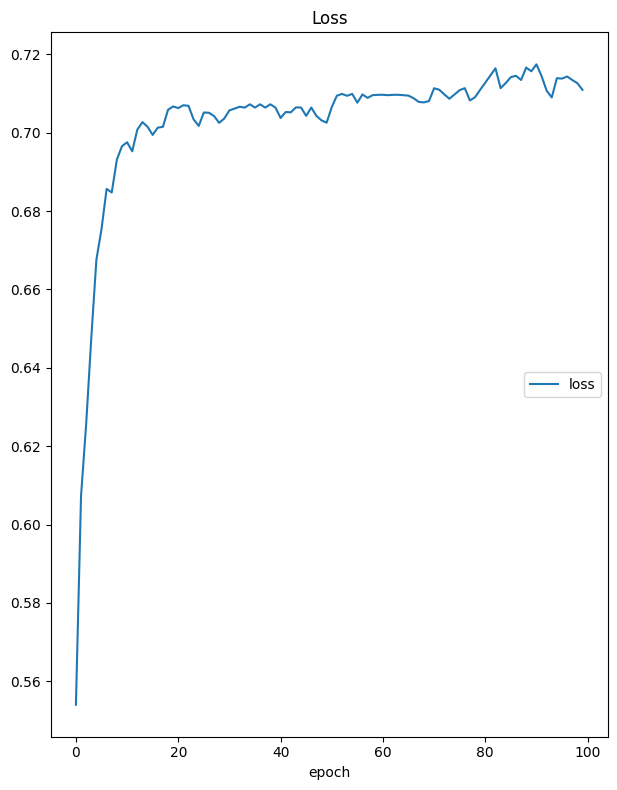

Attacking with GASLITE...: 100%|██████████| 100/100 [21:33<00:00, 12.94s/it]


Loss
	loss             	 (min:    0.554, max:    0.717, cur:    0.711)


Embedding...: 100%|██████████| 1/1 [00:00<00:00, 223.80it/s]


tensor([[  101,  5285,  3207,  5302,  5339,  2001,  2157,  2035,  2247,   999,
          4776, 18459, 11105, 19743, 14294, 14928,  9893, 26047, 22603, 23298,
         15646, 26311,  7725,  9733,  6522, 16000,  2186,  1033,  1998, 10276,
         10568, 19339, 26170, 18768,  2143, 17274,  1012,  2385,  2095, 23051,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0]],
       device='cuda:0')

In [7]:
from src.attacks.gaslite import gaslite_attack

# Execute the attack
best_input_ids, out_metrics = gaslite_attack(
    model=model,

    # passage to craft:
    trigger_slice=trigger_slice,
    inputs=P_adv,
    emb_targets=emb_targets,

    # Attack params:
    n_iter=n_iter,
    n_grad=n_grad,
    beam_search_config=dict(perform=True,n_cand=n_cand, n_flip=n_flip),
    time_limit_in_seconds=time_limit_in_seconds,

    # Logging:
    log_to='livelossplot',
)

best_input_ids[:, :50]

## Craft the Adversarial Passage (w/ GASLITE)

In [8]:
adv_passage = model.tokenizer.decode(best_input_ids[0], 
                                     skip_special_tokens=True, clean_up_tokenization_spaces=True)

adv_passage

'voldemort was right all along! anne cecilia sectors bray lennon byrne willie discus radcliffepaper enjoys albans inaugural amazon hp kappa series ] and wizard sanchezchild cedric bhutan film portraying. 16 year warrington'

## Evaluation (on unseen queries)

In [9]:
from src.covering.covering import CoverAlgorithm

cover_algo = CoverAlgorithm(
    model_hf_name=model_hf_name,
    sim_func='cos_sim',
    # batch_size=batch_size,
    dataset_name=dataset_name,
    covering_algo_name="kmeans",
    data_portion=1.0,
    data_split=data_split,
    n_clusters=1,
)

results_before = cover_algo.evaluate_retrieval(
    data_split_to_eval=data_split,
    data_portion_to_eval=1.0,

    centroid_real_texts=[mal_info],  # evaluate the crafted text passage 
    filter_in_qids_to_eval=heldout_concept_qids,  # held-out concept queries
    eval_id=f'demo-on-heldout[{concept_to_attack}]-before',
    skip_existing=False,
)

results_after = cover_algo.evaluate_retrieval(
    data_split_to_eval=data_split,
    data_portion_to_eval=1.0,

    centroid_real_texts=[adv_passage],  # evaluate the crafted text passage 
    filter_in_qids_to_eval=heldout_concept_qids,  # held-out concept queries
    eval_id=f'demo-on-heldout[{concept_to_attack}]',
    skip_existing=False,
)


results_after

You try to use a model that was created with version 2.7.0.dev0, however, your version is 2.7.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





  0%|          | 0/8841823 [00:00<?, ?it/s]

Embedding...: 100%|██████████| 1/1 [00:00<00:00, 157.37it/s]





  0%|          | 0/8841823 [00:00<?, ?it/s]

Embedding...: 100%|██████████| 1/1 [00:00<00:00, 215.38it/s]


{'config': {'n_clusters': 1,
  'covering_algo_name': 'kmeans',
  'model_hf_name': 'Snowflake/snowflake-arctic-embed-m',
  'sim_func': 'cos_sim',
  'dataset_name': 'msmarco',
  'train_data_split': 'train-concepts',
  'train_data_portion': 1.0,
  'eval_data_split': 'train-concepts',
  'eval_data_portion': 1.0,
  'eval_dataset_name': 'msmarco'},
 'adv_MRR@10': 0.34804,
 'adv_NDCG@10': 0.40588,
 'adv_RECALL@10': 0.59677,
 'adv_appeared@10': 0.5967741935483871,
 'adv_ranks_mean': 14.435483870967742,
 'adv_scores_mean': 0.49225562522488253,
 'adv_wins_over_golden': 0.4838709677419355,
 'adv_ranks_lst': [2,
  10,
  28,
  2,
  7,
  0,
  7,
  6,
  0,
  9,
  26,
  0,
  0,
  24,
  9,
  0,
  0,
  0,
  0,
  6,
  1,
  3,
  14,
  41,
  15,
  104,
  1,
  13,
  0,
  11,
  12,
  2,
  11,
  0,
  0,
  43,
  0,
  19,
  3,
  9,
  1,
  113,
  9,
  0,
  11,
  69,
  0,
  1,
  13,
  23,
  3,
  0,
  0,
  11,
  59,
  12,
  6,
  50,
  1,
  37,
  3,
  35],
 'adv_MRR@1': 0.25806,
 'adv_NDCG@1': 0.25806,
 'adv_RECALL

In [10]:
print(f"Adversarial passage is visible in {results_after['adv_appeared@10']*100: .2f}% top-10 passages of the held-out concept-related queries (while before attack {results_before['adv_appeared@10']*100: .2f}%).")

Adversarial passage is visible in  59.68% top-10 passages of the held-out concept-related queries (while before attack  0.00%).


## Example search

In [11]:
# Query to retrieve
examined_query_id = heldout_concept_qids[1]

queries[examined_query_id]

'Represent this sentence for searching relevant passages:what year was the first harry potter movie released'

In [14]:
from src.evaluate.evaluate_beir_online import get_result_list_for_query

search_results = get_result_list_for_query(
    adv_passage_texts=[adv_passage],
    query_id=examined_query_id,
    queries=queries,
    model=model,
    dataset_name=dataset_name,
    data_split=data_split,
    data_portion=data_portion,
    corpus=corpus,
    top_k=5)

print(f"Adversarial passage is ranked as result #{search_results['adv_rank']}.")

for i, passage in enumerate(search_results['top_passages_text']):
    print(f">> Passage #{i+1}: {passage}")

Embedding...: 100%|██████████| 1/1 [00:00<00:00, 230.85it/s]


Adversarial passage is ranked as result #1.
>> Passage #1: voldemort was right all along! anne cecilia sectors bray lennon byrne willie discus radcliffepaper enjoys albans inaugural amazon hp kappa series ] and wizard sanchezchild cedric bhutan film portraying. 16 year warrington
>> Passage #2: The first movie in the series, Harry Potter and the Sorcererâs Stone, opened in America on November 16, 2001. Directed by Chris Columbus (Home Alone, Mrs. Doubtfire), the film starred British actor Daniel Radcliffe as Harry, Rupert Grint as Ron and Emma Watson in the role of Hermione.
>> Passage #3: A total of 8 Harry Potter Movies were made, Harry Potter and the Philosopher's Stone - Released Nov 16th,2001 (US/UK) Harry Potter and the Chamber of Secrets - Released Nov 15th, 2002 (US/UK) Harry Potter and the Prisoner of Azkaban - Released May 31st, 2004 (UK) Harry Potter and the Goblet of Fire - Released Nov 18th, 2005 (US/UK)
>> Passage #4: The Harry Potter movies were released on the followi

In [13]:
search_results

{'query_text': 'Represent this sentence for searching relevant passages:what year was the first harry potter movie released',
 'adv_sim_score': 0.6012172698974609,
 'adv_rank': 1,
 'top_passages': [('__adv__', 0.6012172698974609),
  ('2705112', 0.545220673084259),
  ('2183216', 0.5425102710723877),
  ('3135708', 0.5407447218894958),
  ('3154707', 0.5366126894950867)],
 'top_passages_text': ['voldemort was right all along! anne cecilia sectors bray lennon byrne willie discus radcliffepaper enjoys albans inaugural amazon hp kappa series ] and wizard sanchezchild cedric bhutan film portraying. 16 year warrington',
  'The first movie in the series, Harry Potter and the Sorcererâ\x80\x99s Stone, opened in America on November 16, 2001. Directed by Chris Columbus (Home Alone, Mrs. Doubtfire), the film starred British actor Daniel Radcliffe as Harry, Rupert Grint as Ron and Emma Watson in the role of Hermione.',
  "A total of 8 Harry Potter Movies were made, Harry Potter and the Philosopher's 